In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *
from knn_weights import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns
from knn_classifier_class import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [78]:
def createPointsInCircle(center, radius, number = 500):
    x = np.random.normal(center[0], radius * 0.4, number)
    y = np.random.normal(center[1], radius * 0.4, number)
    #x = np.random.uniform(center[0] - radius, center[0] + radius, number)
    #y = np.random.uniform(center[1] - radius, center[1] + radius, number)

    points = np.dstack([x, y]).reshape(-1, 2)

    points = points[np.linalg.norm(points[:,:2] - center, axis=1) < radius]

    return points

In [79]:
count = 500

circle1 = createPointsInCircle((10, 10), 5, count)

circle2 = createPointsInCircle((24, 10), 5, count)

In [80]:
X = np.concatenate([circle1, circle2])
y = np.concatenate([np.zeros(circle1.shape[0]), np.ones(circle2.shape[0])])

(955, 2) (474, 2) (481, 2)


(0.0, 30.0)

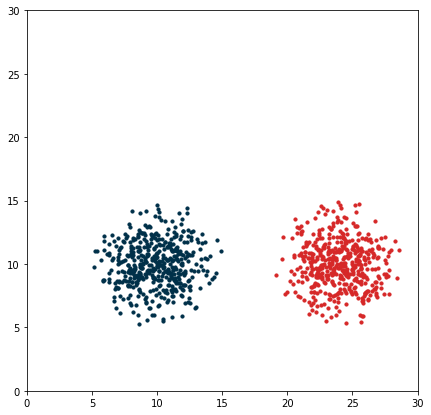

In [81]:
plt.rcParams['figure.figsize'] = [7, 7]

print(X.shape, circle1.shape, circle2.shape)
fig, ax = plt.subplots()

scatter_markers(ax, X[:, 0], X[:, 1], y, 10, 'o')
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

(0.0, 30.0)

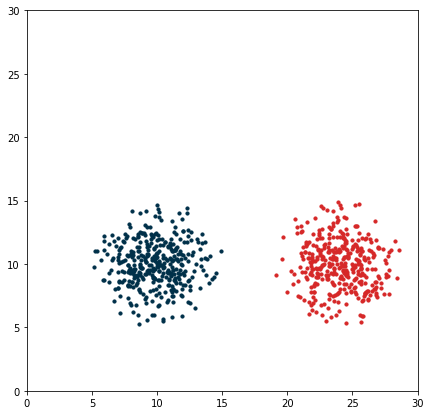

In [83]:
plt.rcParams['figure.figsize'] = [7, 7]
fig, ax = plt.subplots()

scatter_markers(ax, X_train[:, 0], X_train[:, 1], y_train, 10, 'o')
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])

In [84]:
knn_classifier = KnnPowerClassifier(get_dst_metric(2), triangular_window, 100, 30)
knn_classifier.fit(X_train, y_train)

In [85]:
knn_classifier.reduce()

In [86]:
prediction = knn_classifier.predict(X_test)
accuracy = compute_accuracy(prediction, np.int0(y_test))
print(accuracy)


1.0


(0.0, 30.0)

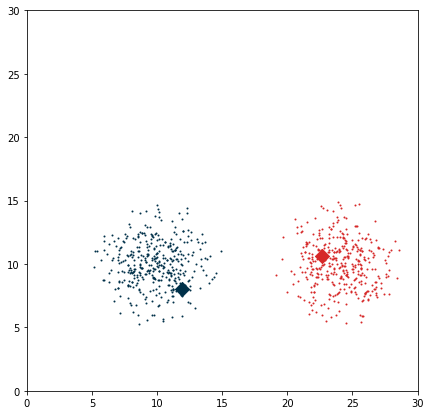

In [87]:
plt.rcParams['figure.figsize'] = [7, 7]

fig, ax = plt.subplots()

scatter_markers(ax, X_train[:, 0], X_train[:, 1], y_train, 1, 'o')
scatter_markers(ax, knn_classifier.reduced_x[:, 0], knn_classifier.reduced_x[:, 1], knn_classifier.reduced_y, 100, 'D')

ax.set_xlim([0, 30])
ax.set_ylim([0, 30])